In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as mticks
import matplotlib.dates as mdates
import os

# Setup

In [2]:
os.listdir('C:/Users/dsdye/Documents/GitHub/assignments//data/project 3/')

['Chicago-Crime_2001.csv',
 'Chicago-Crime_2002.csv',
 'Chicago-Crime_2003.csv',
 'Chicago-Crime_2004.csv',
 'Chicago-Crime_2005.csv',
 'Chicago-Crime_2006.csv',
 'Chicago-Crime_2007.csv',
 'Chicago-Crime_2008.csv',
 'Chicago-Crime_2009.csv',
 'Chicago-Crime_2010.csv',
 'Chicago-Crime_2011.csv',
 'Chicago-Crime_2012.csv',
 'Chicago-Crime_2013.csv',
 'Chicago-Crime_2014.csv',
 'Chicago-Crime_2015.csv',
 'Chicago-Crime_2016.csv',
 'Chicago-Crime_2017.csv',
 'Chicago-Crime_2018.csv',
 'Chicago-Crime_2019.csv',
 'Chicago-Crime_2020.csv',
 'Chicago-Crime_2021.csv',
 'Chicago-Crime_2022.csv',
 'README.txt']

In [3]:
stem = 'C:/Users/dsdye/Documents/GitHub/assignments/data/project 3/'
paths = os.listdir(stem)
paths = [p for p in paths if p[-3:] == 'csv']

In [4]:
[stem + p for p in paths]

['C:/Users/dsdye/Documents/GitHub/assignments/data/project 3/Chicago-Crime_2001.csv',
 'C:/Users/dsdye/Documents/GitHub/assignments/data/project 3/Chicago-Crime_2002.csv',
 'C:/Users/dsdye/Documents/GitHub/assignments/data/project 3/Chicago-Crime_2003.csv',
 'C:/Users/dsdye/Documents/GitHub/assignments/data/project 3/Chicago-Crime_2004.csv',
 'C:/Users/dsdye/Documents/GitHub/assignments/data/project 3/Chicago-Crime_2005.csv',
 'C:/Users/dsdye/Documents/GitHub/assignments/data/project 3/Chicago-Crime_2006.csv',
 'C:/Users/dsdye/Documents/GitHub/assignments/data/project 3/Chicago-Crime_2007.csv',
 'C:/Users/dsdye/Documents/GitHub/assignments/data/project 3/Chicago-Crime_2008.csv',
 'C:/Users/dsdye/Documents/GitHub/assignments/data/project 3/Chicago-Crime_2009.csv',
 'C:/Users/dsdye/Documents/GitHub/assignments/data/project 3/Chicago-Crime_2010.csv',
 'C:/Users/dsdye/Documents/GitHub/assignments/data/project 3/Chicago-Crime_2011.csv',
 'C:/Users/dsdye/Documents/GitHub/assignments/data/pro

In [5]:
list_of_dfs = [pd.read_csv(stem + p) for p in paths]

In [6]:
df = pd.concat(list_of_dfs)

In [7]:
df.head()

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
0,1326041,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185
1,1319931,01/01/2001 01:00:00 PM,BATTERY,SIMPLE,RESIDENCE,False,True,825,8.0,NaN,41.783892,-87.684841
2,1324743,01/01/2001 01:00:00 PM,GAMBLING,ILLEGAL ILL LOTTERY,STREET,True,False,313,3.0,NaN,41.780412,-87.611970
3,1310717,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2424,24.0,NaN,42.012391,-87.678032
4,1318099,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,True,214,2.0,NaN,41.819538,-87.620020


In [8]:
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y %I:%M:%S %p')

In [9]:
df.head()

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
0,1326041,2001-01-01 01:00:00,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185
1,1319931,2001-01-01 13:00:00,BATTERY,SIMPLE,RESIDENCE,False,True,825,8.0,NaN,41.783892,-87.684841
2,1324743,2001-01-01 13:00:00,GAMBLING,ILLEGAL ILL LOTTERY,STREET,True,False,313,3.0,NaN,41.780412,-87.611970
3,1310717,2001-01-01 01:00:00,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2424,24.0,NaN,42.012391,-87.678032
4,1318099,2001-01-01 01:00:00,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,True,214,2.0,NaN,41.819538,-87.620020


In [10]:
!pwd

/c/Users/dsdye/Documents/GitHub


# Part 1: Stakeholder Questions to Answer:

## Question 1

* Which district had the most crimes in 2022?
  * **Answer**: District 8, with 14,805 crimes
* Which had the least?
  * **Answer**: District 31, with 15 crimes

In [11]:
df.info()
df.index

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7713109 entries, 0 to 238857
Data columns (total 12 columns):
 #   Column                Dtype         
---  ------                -----         
 0   ID                    int64         
 1   Date                  datetime64[ns]
 2   Primary Type          object        
 3   Description           object        
 4   Location Description  object        
 5   Arrest                bool          
 6   Domestic              bool          
 7   Beat                  int64         
 8   District              float64       
 9   Ward                  float64       
 10  Latitude              float64       
 11  Longitude             float64       
dtypes: bool(2), datetime64[ns](1), float64(4), int64(2), object(3)
memory usage: 662.0+ MB


Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            238848, 238849, 238850, 238851, 238852, 238853, 238854, 238855,
            238856, 238857],
           dtype='int64', length=7713109)

In [12]:
q1 = df.copy()
q1.head()

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
0,1326041,2001-01-01 01:00:00,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185
1,1319931,2001-01-01 13:00:00,BATTERY,SIMPLE,RESIDENCE,False,True,825,8.0,NaN,41.783892,-87.684841
2,1324743,2001-01-01 13:00:00,GAMBLING,ILLEGAL ILL LOTTERY,STREET,True,False,313,3.0,NaN,41.780412,-87.611970
3,1310717,2001-01-01 01:00:00,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2424,24.0,NaN,42.012391,-87.678032
4,1318099,2001-01-01 01:00:00,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,True,214,2.0,NaN,41.819538,-87.620020


In [13]:
try:
    q1 = q1.set_index('Date')
except KeyError as e:
    pass
q1.head()

,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
Date,,,,,,,,,,,
2001-01-01 01:00:00,1326041,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185
2001-01-01 13:00:00,1319931,BATTERY,SIMPLE,RESIDENCE,False,True,825,8.0,NaN,41.783892,-87.684841
2001-01-01 13:00:00,1324743,GAMBLING,ILLEGAL ILL LOTTERY,STREET,True,False,313,3.0,NaN,41.780412,-87.611970
2001-01-01 01:00:00,1310717,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2424,24.0,NaN,42.012391,-87.678032
2001-01-01 01:00:00,1318099,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,True,214,2.0,NaN,41.819538,-87.620020


In [14]:
q1 = q1.loc['2022']

In [15]:
q1.head()
# q1.shape

,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
Date,,,,,,,,,,,
2022-01-01 13:00:00,12582293,THEFT,$500 AND UNDER,RESTAURANT,False,False,121,1.0,42.0,41.881884,-87.640060
2022-01-01 13:00:00,12607313,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,BANK,False,False,811,8.0,23.0,41.787923,-87.769446
2022-01-01 01:00:00,12585671,CRIMINAL DAMAGE,TO VEHICLE,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,531,5.0,9.0,41.687443,-87.604120
2022-01-01 01:00:00,12592889,OTHER OFFENSE,HARASSMENT BY TELEPHONE,APARTMENT,False,False,412,4.0,8.0,41.734353,-87.585147
2022-01-01 01:00:00,12584977,THEFT,$500 AND UNDER,OTHER (SPECIFY),False,False,1811,18.0,2.0,41.910818,-87.654560


In [16]:
ts = q1.groupby('District', as_index=False).size()
ts = ts.rename(columns={'size': 'Crimes'})

In [17]:
ts

,District,Crimes
0,1.0,13044
1,2.0,11793
2,3.0,11937
3,4.0,13931
4,5.0,9773
5,6.0,14694
6,7.0,10319
7,8.0,14805
8,9.0,10376
9,10.0,9961


In [18]:
# ts = ts.set_index('District')

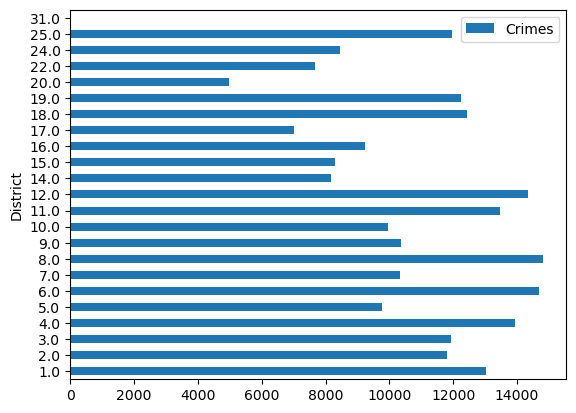

In [19]:
ts.plot(kind='barh', x='District', y='Crimes');

In [20]:
ts.loc[ts['Crimes'].idxmax()]

District        8.0
Crimes      14805.0
Name: 7, dtype: float64

In [21]:
ts.loc[ts['Crimes'].idxmin()]

District    31.0
Crimes      15.0
Name: 22, dtype: float64

In [22]:
del q1
del ts

## Question 2

* Is the total number of crimes increasing or decreasing across the years?
  * **Answer**: Decreasing
* Are there any individual crimes that are doing the opposite (e.g., decreasing when overall crime is increasing or vice-versa)?
  * **Answer**: Yes: Human Trafficking, 
Concealed Carry License Violatio, 
Criminal Sexual Assau, t
Stalk, and ng
Weapons Viola have all increased and are trending upward.tion

In [23]:
q2 = df.copy()
q2.head()

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
0,1326041,2001-01-01 01:00:00,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185
1,1319931,2001-01-01 13:00:00,BATTERY,SIMPLE,RESIDENCE,False,True,825,8.0,NaN,41.783892,-87.684841
2,1324743,2001-01-01 13:00:00,GAMBLING,ILLEGAL ILL LOTTERY,STREET,True,False,313,3.0,NaN,41.780412,-87.611970
3,1310717,2001-01-01 01:00:00,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2424,24.0,NaN,42.012391,-87.678032
4,1318099,2001-01-01 01:00:00,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,True,214,2.0,NaN,41.819538,-87.620020


In [24]:
q2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7713109 entries, 0 to 238857
Data columns (total 12 columns):
 #   Column                Dtype         
---  ------                -----         
 0   ID                    int64         
 1   Date                  datetime64[ns]
 2   Primary Type          object        
 3   Description           object        
 4   Location Description  object        
 5   Arrest                bool          
 6   Domestic              bool          
 7   Beat                  int64         
 8   District              float64       
 9   Ward                  float64       
 10  Latitude              float64       
 11  Longitude             float64       
dtypes: bool(2), datetime64[ns](1), float64(4), int64(2), object(3)
memory usage: 662.0+ MB


In [25]:
# q2['Date'] = pd.to_datetime(q2['Date'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')

# TODO: only coerce once

In [26]:
q2 = q2[['Date', 'Primary Type']]

In [27]:
q2 = q2.drop_duplicates()

In [28]:
try:
    q2 = q2.set_index('Date')
except KeyError as e:
    pass
q2.head()

,Primary Type
Date,
2001-01-01 01:00:00,BATTERY
2001-01-01 13:00:00,BATTERY
2001-01-01 13:00:00,GAMBLING
2001-01-01 01:00:00,CRIMINAL DAMAGE
2001-01-01 01:00:00,OFFENSE INVOLVING CHILDREN


In [29]:
q2.head()

,Primary Type
Date,
2001-01-01 01:00:00,BATTERY
2001-01-01 13:00:00,BATTERY
2001-01-01 13:00:00,GAMBLING
2001-01-01 01:00:00,CRIMINAL DAMAGE
2001-01-01 01:00:00,OFFENSE INVOLVING CHILDREN


In [30]:
crimes_list = q2['Primary Type'].unique()
crimes_dict = {}
crimes_list

array(['BATTERY', 'GAMBLING', 'CRIMINAL DAMAGE',
       'OFFENSE INVOLVING CHILDREN', 'THEFT', 'ASSAULT', 'NARCOTICS',
       'CRIM SEXUAL ASSAULT', 'DECEPTIVE PRACTICE', 'WEAPONS VIOLATION',
       'OTHER OFFENSE', 'MOTOR VEHICLE THEFT', 'SEX OFFENSE', 'BURGLARY',
       'PUBLIC PEACE VIOLATION', 'LIQUOR LAW VIOLATION', 'ROBBERY',
       'CRIMINAL TRESPASS', 'INTERFERENCE WITH PUBLIC OFFICER',
       'HOMICIDE', 'KIDNAPPING', 'PROSTITUTION', 'STALKING',
       'INTIMIDATION', 'CRIMINAL SEXUAL ASSAULT', 'ARSON', 'RITUALISM',
       'DOMESTIC VIOLENCE', 'OBSCENITY', 'OTHER NARCOTIC VIOLATION',
       'PUBLIC INDECENCY', 'CONCEALED CARRY LICENSE VIOLATION',
       'NON-CRIMINAL', 'HUMAN TRAFFICKING',
       'NON-CRIMINAL (SUBJECT SPECIFIED)', 'NON - CRIMINAL'], dtype=object)

In [31]:
def handle(df, crime, dict):
    x = q2.loc[q2['Primary Type' ] == crime].resample('Y').size()
    # .to_frame()
    crimes_dict[crime] = x
    # .squeeze()
    return crimes_dict

In [32]:
[handle(q2, crime, crimes_dict) for crime in crimes_list];
# crimes_dict

In [33]:
cf = pd.DataFrame(crimes_dict)
cf.head()

,BATTERY,GAMBLING,CRIMINAL DAMAGE,OFFENSE INVOLVING CHILDREN,THEFT,ASSAULT,NARCOTICS,CRIM SEXUAL ASSAULT,DECEPTIVE PRACTICE,WEAPONS VIOLATION,...,RITUALISM,DOMESTIC VIOLENCE,OBSCENITY,OTHER NARCOTIC VIOLATION,PUBLIC INDECENCY,CONCEALED CARRY LICENSE VIOLATION,NON-CRIMINAL,HUMAN TRAFFICKING,NON-CRIMINAL (SUBJECT SPECIFIED),NON - CRIMINAL
Date,,,,,,,,,,,,,,,,,,,,,
2001-12-31,70663,926,36333,2029,46219,26741,42596,1710.0,10857,4220,...,8.0,1.0,19,6,9,1,NaN,NaN,NaN,NaN
2002-12-31,70857,963,36411,2312,45000,26828,43786,1731.0,9808,4214,...,2.0,NaN,26,5,8,0,NaN,NaN,NaN,NaN
2003-12-31,65557,1080,34947,2675,43797,25100,42862,1500.0,9843,4133,...,2.0,NaN,16,2,6,0,1.0,NaN,NaN,NaN
2004-12-31,63456,1106,33687,2730,42233,24425,47278,1441.0,9641,4239,...,1.0,NaN,13,9,9,0,0.0,NaN,NaN,NaN
2005-12-31,62516,1062,34844,2550,40830,23503,47978,1421.0,9769,4042,...,2.0,NaN,19,9,4,0,0.0,NaN,NaN,NaN


In [34]:
cf = cf.fillna(0)
cf

,BATTERY,GAMBLING,CRIMINAL DAMAGE,OFFENSE INVOLVING CHILDREN,THEFT,ASSAULT,NARCOTICS,CRIM SEXUAL ASSAULT,DECEPTIVE PRACTICE,WEAPONS VIOLATION,...,RITUALISM,DOMESTIC VIOLENCE,OBSCENITY,OTHER NARCOTIC VIOLATION,PUBLIC INDECENCY,CONCEALED CARRY LICENSE VIOLATION,NON-CRIMINAL,HUMAN TRAFFICKING,NON-CRIMINAL (SUBJECT SPECIFIED),NON - CRIMINAL
Date,,,,,,,,,,,,,,,,,,,,,
2001-12-31,70663,926,36333,2029,46219,26741,42596,1710.0,10857,4220,...,8.0,1.0,19,6,9,1,0.0,0.0,0.0,0.0
2002-12-31,70857,963,36411,2312,45000,26828,43786,1731.0,9808,4214,...,2.0,0.0,26,5,8,0,0.0,0.0,0.0,0.0
2003-12-31,65557,1080,34947,2675,43797,25100,42862,1500.0,9843,4133,...,2.0,0.0,16,2,6,0,1.0,0.0,0.0,0.0
2004-12-31,63456,1106,33687,2730,42233,24425,47278,1441.0,9641,4239,...,1.0,0.0,13,9,9,0,0.0,0.0,0.0,0.0
2005-12-31,62516,1062,34844,2550,40830,23503,47978,1421.0,9769,4042,...,2.0,0.0,19,9,4,0,0.0,0.0,0.0,0.0
2006-12-31,60128,1351,35030,2431,39807,22536,49652,1360.0,9651,3766,...,7.0,0.0,17,9,4,0,0.0,0.0,0.0,0.0
2007-12-31,60405,1392,33793,2578,39387,23104,47579,1431.0,9782,3522,...,1.0,0.0,12,12,5,0,0.0,0.0,0.0,0.0
2008-12-31,57995,1188,32701,2381,39903,22125,41500,1411.0,10208,3831,...,0.0,0.0,13,12,4,0,0.0,0.0,0.0,0.0
2009-12-31,49421,981,29274,2305,37152,19547,37538,1302.0,9638,4103,...,0.0,0.0,21,7,10,0,1.0,0.0,0.0,0.0


In [35]:
cf.index

DatetimeIndex(['2001-12-31', '2002-12-31', '2003-12-31', '2004-12-31',
               '2005-12-31', '2006-12-31', '2007-12-31', '2008-12-31',
               '2009-12-31', '2010-12-31', '2011-12-31', '2012-12-31',
               '2013-12-31', '2014-12-31', '2015-12-31', '2016-12-31',
               '2017-12-31', '2018-12-31', '2019-12-31', '2020-12-31',
               '2021-12-31', '2022-12-31'],
              dtype='datetime64[ns]', name='Date', freq='A-DEC')

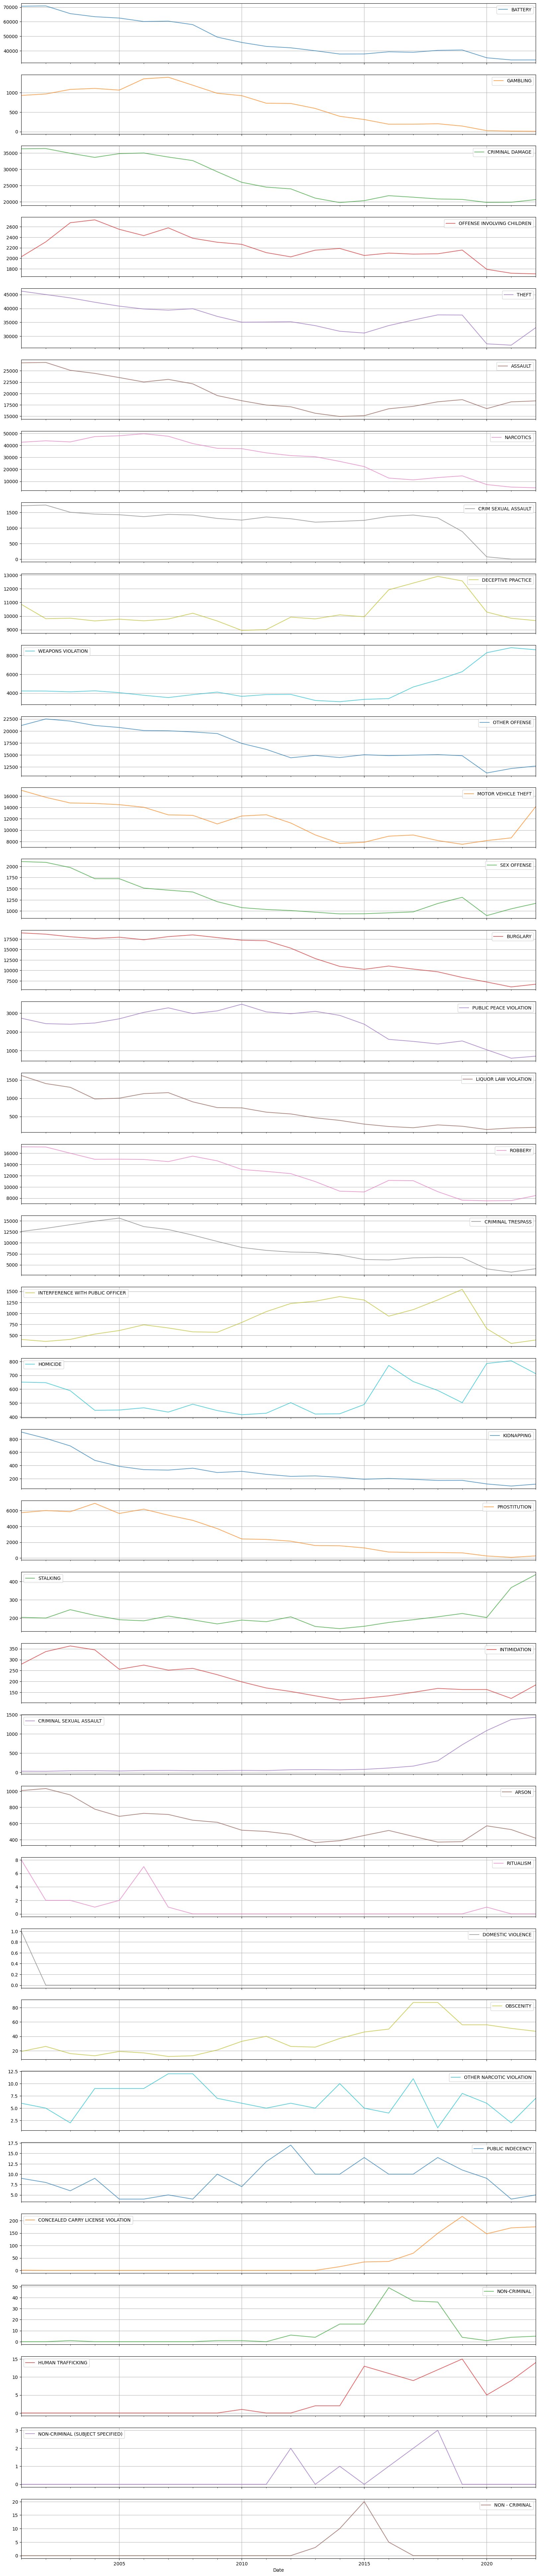

In [36]:
cf.plot(grid=True, subplots=True, figsize=(20,100), alpha=0.7);

In [37]:
del q2
del cf

## Question 3

**Are crimes more common during AM or PM rush hour?** **Answer**:

In [ ]:
# Are crimes more common during AM rush hour or PM rush hour?
# You can consider any crime that occurred between 7 AM - 10 AM as AM rush hour
# You can consider any crime that occurred between 4 - 7 PM as PM rush hour.


In [54]:
q3 = df.copy()
q3.head()

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
0,1326041,2001-01-01 01:00:00,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185
1,1319931,2001-01-01 13:00:00,BATTERY,SIMPLE,RESIDENCE,False,True,825,8.0,NaN,41.783892,-87.684841
2,1324743,2001-01-01 13:00:00,GAMBLING,ILLEGAL ILL LOTTERY,STREET,True,False,313,3.0,NaN,41.780412,-87.611970
3,1310717,2001-01-01 01:00:00,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2424,24.0,NaN,42.012391,-87.678032
4,1318099,2001-01-01 01:00:00,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,True,214,2.0,NaN,41.819538,-87.620020


In [55]:
q3['Date'] = pd.to_datetime(q3['Date'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')

In [56]:
try:
    q3 = q3.set_index('Date')
except KeyError as e:
    pass
q3.head()

,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
Date,,,,,,,,,,,
2001-01-01 01:00:00,1326041,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185
2001-01-01 13:00:00,1319931,BATTERY,SIMPLE,RESIDENCE,False,True,825,8.0,NaN,41.783892,-87.684841
2001-01-01 13:00:00,1324743,GAMBLING,ILLEGAL ILL LOTTERY,STREET,True,False,313,3.0,NaN,41.780412,-87.611970
2001-01-01 01:00:00,1310717,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2424,24.0,NaN,42.012391,-87.678032
2001-01-01 01:00:00,1318099,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,True,214,2.0,NaN,41.819538,-87.620020


In [57]:
q3.index

DatetimeIndex(['2001-01-01 01:00:00', '2001-01-01 13:00:00',
               '2001-01-01 13:00:00', '2001-01-01 01:00:00',
               '2001-01-01 01:00:00', '2001-01-01 01:00:00',
               '2001-01-01 01:00:00', '2001-01-01 01:00:00',
               '2001-01-01 01:00:00', '2001-01-01 01:00:00',
               ...
               '2022-12-31 12:41:00', '2022-12-31 00:42:00',
               '2022-12-31 00:44:00', '2022-12-31 00:45:00',
               '2022-12-31 12:45:00', '2022-12-31 12:50:00',
               '2022-12-31 12:50:00', '2022-12-31 00:52:00',
               '2022-12-31 12:52:00', '2022-12-31 12:59:00'],
              dtype='datetime64[ns]', name='Date', length=7713109, freq=None)

In [58]:
q3['Hour'] = q3.index.hour

In [59]:
q3.index
q3.head()

,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,Hour
Date,,,,,,,,,,,,
2001-01-01 01:00:00,1326041,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185,1
2001-01-01 13:00:00,1319931,BATTERY,SIMPLE,RESIDENCE,False,True,825,8.0,NaN,41.783892,-87.684841,13
2001-01-01 13:00:00,1324743,GAMBLING,ILLEGAL ILL LOTTERY,STREET,True,False,313,3.0,NaN,41.780412,-87.611970,13
2001-01-01 01:00:00,1310717,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2424,24.0,NaN,42.012391,-87.678032,1
2001-01-01 01:00:00,1318099,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,True,214,2.0,NaN,41.819538,-87.620020,1


In [60]:
q3 = q3[['Primary Type', 'Hour']]

In [61]:
q3.head()

,Primary Type,Hour
Date,,
2001-01-01 01:00:00,BATTERY,1
2001-01-01 13:00:00,BATTERY,13
2001-01-01 13:00:00,GAMBLING,13
2001-01-01 01:00:00,CRIMINAL DAMAGE,1
2001-01-01 01:00:00,BATTERY,1


In [63]:
am_df = q3.loc[q3['Hour'].isin(range(7,10))]
pm_df = q3.loc[q3['Hour'].isin(range(16,19))]

In [65]:
am_df.shape, pm_df.shape

((770651, 2), (1206353, 2))

**What are the top 5 most common crimes during AM rush hour?**

In [76]:
am_df[['Primary Type']].value_counts().head()

Primary Type   
THEFT              185239
BATTERY            108199
CRIMINAL DAMAGE     81281
BURGLARY            73999
OTHER OFFENSE       62453
dtype: int64

**Answer**:
| Primary Type    | Morning Crimes |
|-----------------|:--------------:|
| THEFT           |     185,239    |
| BATTERY         |     108,199    |
| CRIMINAL DAMAGE |     81,281     |
| BURGLARY        |     73,999     |
| OTHER OFFENSE   |     62,453     |     |     |,453 |

**What are the top 5 most common crimes during PM rush hour?**

In [79]:
pm_df[['Primary Type']].value_counts().head()

Primary Type   
THEFT              293514
BATTERY            213002
CRIMINAL DAMAGE    134101
NARCOTICS          103032
ASSAULT             89600
dtype: int64

**Answer**:
| Primary Type    | Evening Crimes |
|-----------------|:--------------:|
| THEFT           |     293,514    |
| BATTERY         |     213,002    |
| CRIMINAL DAMAGE |     134,101    |
| NARCOTICS       |     103,032    |
| ASSAULT         |     89,600     |